# Information gain

based on [Python Machine Learning Code Repository](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch03)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Gigi Impurity:
$$
\begin{align*}
\sum_{j=1}^2 p_j (1-p_j) = p(1-p) + (1-p)(1-(1-p))
\end{align*}
$$

In [2]:
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1 - p))

Entropy:
$$
\begin{align*}
-\sum_{j=1}^2 p_j \log_2(p_j) = - p \log_2(p) - (1 - p) \log_2 (1-p)
\end{align*}
$$

In [3]:
def entropy(p):
    return - p*np.log2(p) - (1-p)*np.log2(1-p)

Misclassification Error:
$$
\begin{align*}
1 - \max_{1 \leq j \leq 2} \{p_j\}
\end{align*}
$$

In [4]:
def error(p):
    return 1 - np.max([p, 1-p])

In [5]:
# p = 0.00, 0.01, 0.02, ..., 1.00
x = np.arange(0.0, 1.0, 0.01)
print(x[:3], x[50])

[0.   0.01 0.02] 0.5


In [6]:
# entropy
ent = [entropy(p) if p != 0 else None for p in x]
# scaled entropy
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
print(ent[:3], ent[50])
print(sc_ent[:3], sc_ent[50])
print(err[:3], err[50])

[None, 0.08079313589591118, 0.14144054254182067] 1.0
[None, 0.04039656794795559, 0.07072027127091034] 0.5
[0.0, 0.010000000000000009, 0.020000000000000018] 0.5


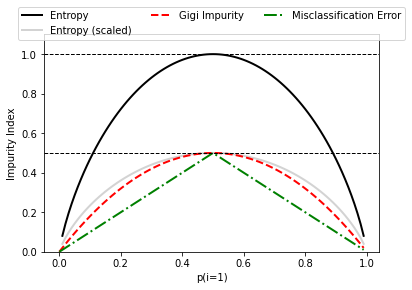

In [7]:
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)', 'Gigi Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()